**AUTHOR NAME : TULASI VENKATA SIRI**

**ORGANISATION  : Sparks Foundation**

# Data Science and Business Analytics Internship at The Sparks Foundation

# TASK 1: Prediction using Supervised Machine Learning
    
**The aim of the task is to predict the percentage of a student based on the no. of study hours using the linear Regression Supervised machine learning algorithm.** 

**Steps to be followed :**
    
**STEP 1:** Importing the dataset

**STEP 2:** Visualizing the dataset

**STEP 3:** Data Preparation

**STEP 4:** Training the algorithm

**STEP 5:** Visualizing the model

**STEP 6:** Making Predictions

**STEP 7:** Evaluating the model

# STEP 1: Importing the libraries and dataset

**In this step we will import the required libraries and dataset through the link given**

In [101]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
#Reading the data from the link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [103]:
#Lets observe the dataset
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [104]:
data.tail(6)

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [105]:
# To find the shape of the dataset
data.shape

(25, 2)

In [106]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [107]:
#To check whether there exist any null or missing values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# STEP 2: Visualizing the dataset

**We will plot the dataset and check whether there exist any relation between the variables**

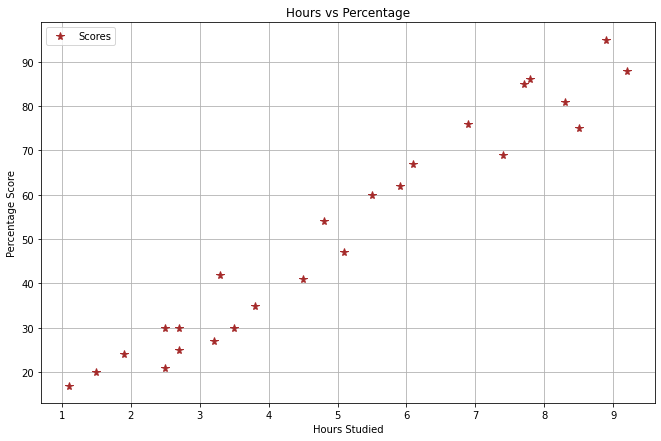

In [108]:
#Plotting the dataset
plt.rcParams["figure.figsize"]=[11,7]
data.plot(x = 'Hours', y = 'Scores', style='*', color = 'brown', markersize = 8)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

By observing the above graph we found that there exist a linear relationship between "hours studied" and "percentage score". so, we will use linear regression supervised machine model and predict the coming values. 

In [109]:
#To find correlation between variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# STEP 3: Data Preparation


**In the step we will divide the data into inputs and outputs and then divide the whole dataset into two parts**
1) Testing data

2) Training data

In [113]:
#here we used iloc function in order to divide the data
X = data.iloc[:, :1].values
Y = data.iloc[:, 1:].values

In [114]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [115]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [116]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# STEP 4: Training the Algorithm

**we have split the data into training and testing sets, and now its finally the time to train algorithm**
    

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# STEP 5: Visualizing the data
**Visualizing the model after training it**

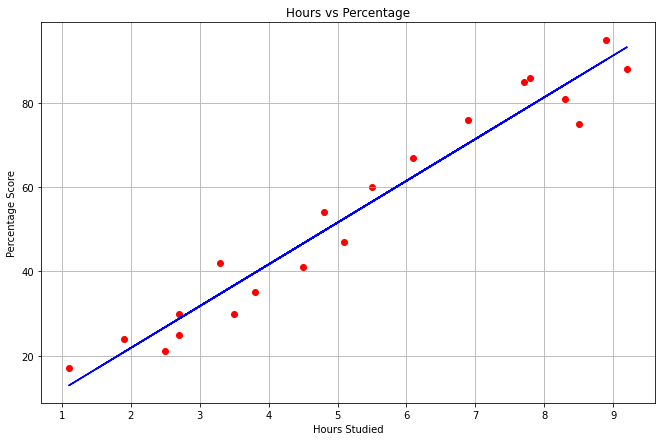

In [95]:
line = model.coef_*X + model.intercept_

#plotting for the training data
plt.rcParams["figure.figsize"]=[11,7]
plt.scatter(X_train, Y_train, color='red')
plt.plot(X, line, color='blue');
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


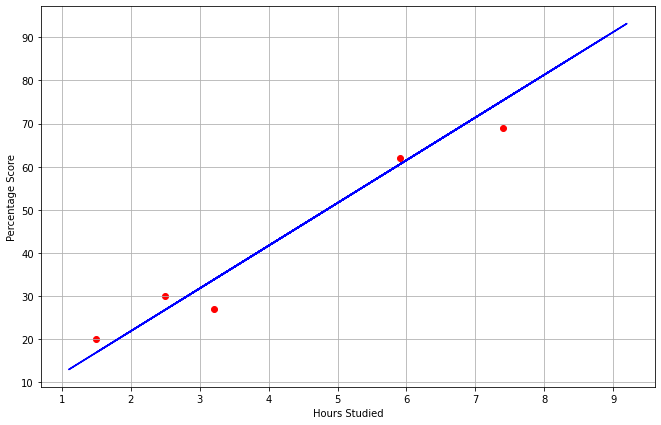

In [97]:
plt.rcParams["figure.figsize"]=[11,7]
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X, line, color = 'blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# STEP 6: Making Predictions

**After training the algorithm, then we will make some predictions**

In [98]:
Y_predicted = model.predict(X_test)

In [99]:
#comparing the actual and predicted data
data = pd.DataFrame({'Actual score':Y_test, 'Predicted score':Y_predicted})
data

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [100]:
hrs = 9.25
own_prediction = model.predict([[hrs]])
print("The predicted score if a person studies for",hrs , "hours is", own_prediction[0])

The predicted score if a person studies for 9.25 hours is 93.69173248737538


If a student studies for 9.25 hours then the predicted score is 93.69173248737538

# STEP 7: Evaluating the model

**Final Step, we are going to evaluate our trained model by calculating mean absolute error**

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))

Mean Absolute Error: 4.183859899002975
